# Multiclass SVM 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#IRIS 데이터 로드
iris =  sns.load_dataset('iris') 
X= iris.iloc[:,:4] #학습할데이터
y = iris.iloc[:,-1] #타겟
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [3]:
def standardization(train, test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test

X_train, X_test = standardization(X_train, X_test)

In [4]:
X_train

array([[ 0.78522493,  0.32015325,  0.77221097,  1.04726529],
       [-0.26563371, -1.29989934,  0.0982814 , -0.11996537],
       [ 0.43493872,  0.78302542,  0.94069336,  1.43634218],
       [-0.84944407,  0.78302542, -1.24957775, -1.28719604],
       [-0.38239578, -1.7627715 ,  0.15444219,  0.13941922],
       [ 0.55170079, -0.374155  ,  1.05301496,  0.7878807 ],
       [ 0.31817664, -0.14271892,  0.65988937,  0.7878807 ],
       [ 0.20141457, -0.374155  ,  0.43524618,  0.39880381],
       [-1.66677857, -0.14271892, -1.36189934, -1.28719604],
       [-0.14887164, -0.60559109,  0.21060299,  0.13941922],
       [-0.14887164, -1.06846325, -0.12636179, -0.24965767],
       [ 0.31817664, -0.60559109,  0.15444219,  0.13941922],
       [ 0.66846286, -0.83702717,  0.88453256,  0.91757299],
       [ 0.0846525 , -0.14271892,  0.77221097,  0.7878807 ],
       [-0.49915786, -0.14271892,  0.43524618,  0.39880381],
       [-0.26563371, -0.60559109,  0.65988937,  1.04726529],
       [ 2.18636979,  1.

In [5]:
X_test

array([[-0.14887164, -0.374155  ,  0.26676379,  0.13941922],
       [ 0.31817664, -0.60559109,  0.54756778,  0.00972692],
       [ 0.31817664, -1.06846325,  1.05301496,  0.26911151],
       [-1.5500165 , -1.7627715 , -1.36189934, -1.15750374],
       [ 0.0846525 ,  0.32015325,  0.60372857,  0.7878807 ],
       [ 0.78522493, -0.14271892,  0.99685416,  0.7878807 ],
       [-0.84944407,  1.70876975, -1.24957775, -1.15750374],
       [ 0.20141457, -0.14271892,  0.60372857,  0.7878807 ],
       [-0.38239578,  2.63451409, -1.30573855, -1.28719604],
       [-0.38239578, -1.29989934,  0.15444219,  0.13941922],
       [ 0.66846286,  0.08871717,  0.99685416,  0.7878807 ],
       [-0.38239578,  1.0144615 , -1.36189934, -1.28719604],
       [-0.49915786,  0.78302542, -1.13725615, -1.28719604],
       [ 0.43493872, -0.60559109,  0.60372857,  0.7878807 ],
       [ 0.55170079, -1.7627715 ,  0.37908538,  0.13941922],
       [ 0.55170079,  0.55158933,  0.54756778,  0.52849611],
       [-1.19973028,  0.

In [16]:
class MultiClassSVM:
    def __init__(self):
        self.classifiers = {}
    
    def fit(self, X_train, y_train):
        self.classes_ = np.unique(y_train)
        
        for class_label in self.classes_:
            binary_y = np.array([1 if y == class_label else -1 for y in y_train])
            clf = SVC(kernel="linear", probability=True)
            clf.fit(X_train, binary_y)
            self.classifiers[class_label] = clf
    
    def predict(self, X_test):
        decision_function_values = {class_label: clf.decision_function(X_test) for class_label, clf in self.classifiers.items()}
        predictions = []
        for i in range(X_test.shape[0]):
            predicted_class = max(decision_function_values, key=lambda class_label: decision_function_values[class_label][i])
            predictions.append(predicted_class)
        
        return predictions

In [17]:
multi_svm = MultiClassSVM()
multi_svm.fit(X_train, y_train)

In [18]:
y_pred = multi_svm.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

# SVM Performance Analysis

성능에 주요한 영향을 미친 feature 2개 추출

In [20]:
feature_accuracies = {}

for feature in X.columns:
    X_temp_train = X_train[:, [X.columns.get_loc(feature)]]
    X_temp_test = X_test[:, [X.columns.get_loc(feature)]]
    
    # Train SVM
    svm = SVC(kernel="linear")
    svm.fit(X_temp_train, y_train)
    
    # Predict and calculate accuracy
    predictions = svm.predict(X_temp_test)
    acc = accuracy_score(y_test, predictions)
    
    feature_accuracies[feature] = acc

# Sorting the features based on accuracy
sorted_features = sorted(feature_accuracies, key=feature_accuracies.get, reverse=True)

# Getting the top 2 features
top_2_features = sorted_features[:2]
top_2_features

['petal_length', 'petal_width']

결정 경계 설정 및 시각화

In [21]:
label_to_int = {label: idx for idx, label in enumerate(y.unique())}
int_to_label = {idx: label for label, idx in label_to_int.items()}

X_train_2f = X_train[:, [X.columns.get_loc(top_2_features[0]), X.columns.get_loc(top_2_features[1])]]
X_test_2f = X_test[:, [X.columns.get_loc(top_2_features[0]), X.columns.get_loc(top_2_features[1])]]

multi_svm_2f_int = MultiClassSVM()
multi_svm_2f_int.fit(X_train_2f, [label_to_int[label] for label in y_train])

x_min, x_max = X_train_2f[:, 0].min() - 1, X_train_2f[:, 0].max() + 1
y_min, y_max = X_train_2f[:, 1].min() - 1, X_train_2f[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

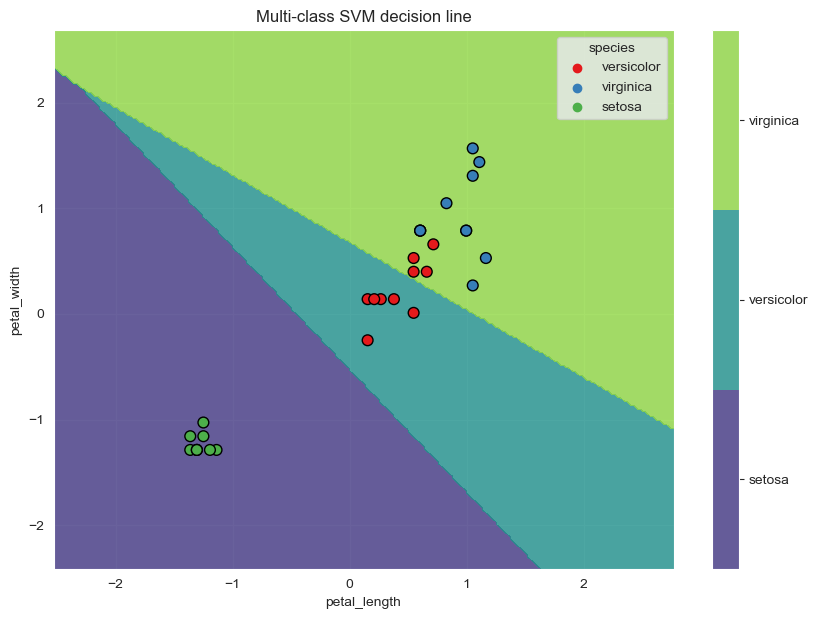

In [24]:
Z_int = multi_svm_2f_int.predict(np.c_[xx.ravel(), yy.ravel()])
Z_int_reshaped = np.array(Z_int).reshape(xx.shape)

plt.figure(figsize=(10, 7))
contour = plt.contourf(xx, yy, Z_int_reshaped, alpha=0.8, levels=np.arange(len(int_to_label) + 1) - 0.5, cmap="viridis")
cbar = plt.colorbar(ticks=np.arange(len(int_to_label)))
cbar.set_ticklabels(list(int_to_label.values()))

sns.scatterplot(x=X_test_2f[:, 0], y=X_test_2f[:, 1], hue=y_test, edgecolor="black", linewidth=1, palette="Set1", s=60)

plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title('Multi-class SVM decision boundaries')
plt.legend(title='species')
plt.show()

Confusion Matrix 시각화

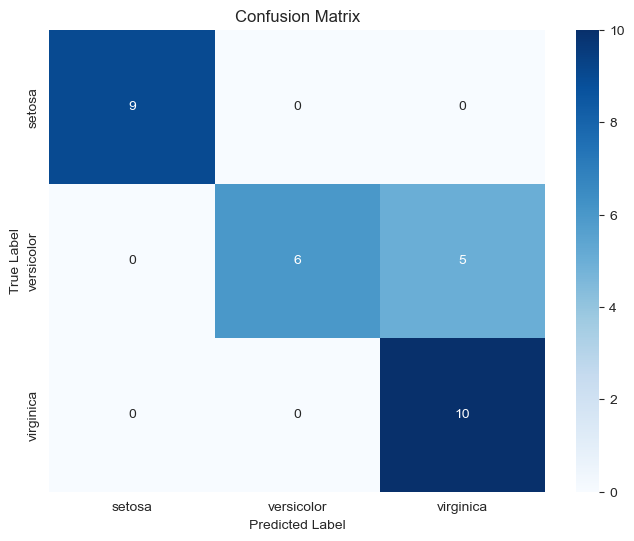

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


def map_labels_to_int(labels):
    return [label_to_int[label] for label in labels]

# 1. Creating and visualizing the confusion matrix
y_pred_2f = multi_svm_2f_int.predict(X_test_2f)
conf_mat = confusion_matrix(map_labels_to_int(y_test), y_pred_2f)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", 
            xticklabels=list(int_to_label.values()), 
            yticklabels=list(int_to_label.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

각 metric에 대한 classification report 생성

In [27]:
# 2. Printing the classification report
report = classification_report(map_labels_to_int(y_test), y_pred_2f, target_names=list(int_to_label.values()))
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.55      0.71        11
   virginica       0.67      1.00      0.80        10

    accuracy                           0.83        30
   macro avg       0.89      0.85      0.84        30
weighted avg       0.89      0.83      0.83        30


support vector만 시각화

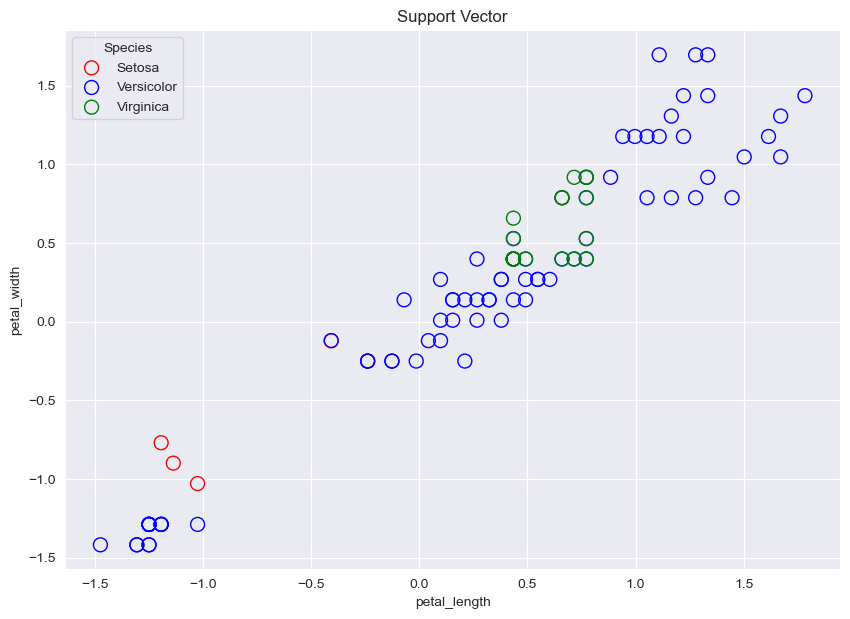

In [28]:
support_vectors_setosa = multi_svm_2f_int.classifiers[0].support_vectors_
support_vectors_versicolor = multi_svm_2f_int.classifiers[1].support_vectors_
support_vectors_virginica = multi_svm_2f_int.classifiers[2].support_vectors_

plt.figure(figsize=(10, 7))

plt.scatter(support_vectors_setosa[:, 0], support_vectors_setosa[:, 1], s=100, facecolors='none', edgecolors='r', marker='o', label='Setosa')
plt.scatter(support_vectors_versicolor[:, 0], support_vectors_versicolor[:, 1], s=100, facecolors='none', edgecolors='b', marker='o', label='Versicolor')
plt.scatter(support_vectors_virginica[:, 0], support_vectors_virginica[:, 1], s=100, facecolors='none', edgecolors='g', marker='o', label='Virginica')

plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.title('Support Vector')
plt.legend(title='Species')
plt.show()